# Churn Prediction
Churn Prediction is one of the most popular big data use cases in the business world, and it helps identify customers who are most likely to cancel a subscription to a service.

(If Churn = 1, customer canceled subscription. If Churn = 0, customer continues subscription.)

# Data Used

For this analysis, the open source Cell2Cell data prepared by the Teradata center for customer relationship management at Duke University was obtained from Kaggle.

Our data consists of 51,047 samples / rows and 58 features / columns.

# Purpose of the study

Tried to predict and analyzed Customer Loss with classification algorithms.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
train=pd.read_csv('cell2celltrain.csv')
test=pd.read_csv('cell2cellholdout.csv')

In [ ]:
test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [ ]:
train.describe()

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [ ]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1684
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
NCRDNN910            1
SEWHDR541            1
VAHWAY540            1
MILLKM920            1
FLNWAU863            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     Ha

# Veri Analizi


In [ ]:
train.drop('CustomerID',axis=1, inplace=True)

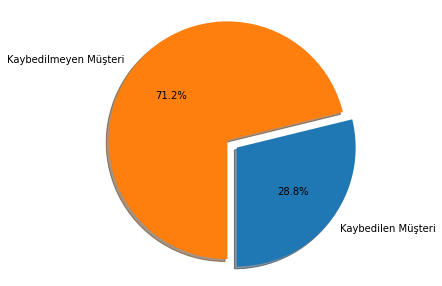

In [ ]:
#Verinin dengeli mi dengesiz mi dağıldığını görmek için Churn olan ve olmayan müşteri sayısının görselleştirilmesi.
churn=train[train['Churn']=='Yes'].shape[0]
non_churn= train[train['Churn']=='No'].shape[0]

slices=[churn,non_churn]
labels=['Kaybedilen Müşteri','Kaybedilmeyen Müşteri']
explode=[0.1,0]

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()
#Churn müşterisi için % 28,8 veriye sahibiz.Veri dengesiz diyemeyiz yani analiz için kullanılabilir.

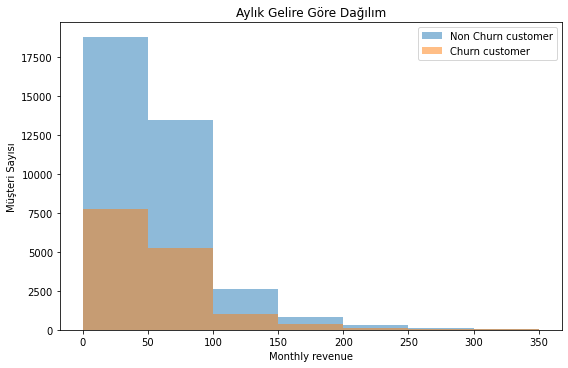

In [ ]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5,label='Churn customer')
plt.ylabel("Müşteri Sayısı")
plt.xlabel("MonthlyRevenue")
plt.legend()
plt.tight_layout()
plt.title('Aylık Gelire Göre Dağılım')
plt.show()
#Churn müşteri ile churn olmayan müşterinin aylık gelirleri farklı oluyor.Eksik değerleri doldururken yararlanılabilir

18.756263835289047


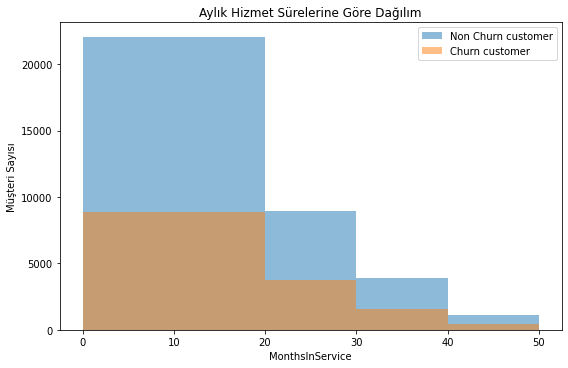

In [ ]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthsInService'],bins=[0,20,30,40,50],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthsInService'],bins=[0,20,30,40,50],alpha=0.5,label='Churn customer')
plt.ylabel("Müşteri Sayısı")
plt.xlabel("MonthsInService")
plt.legend()
plt.tight_layout()
plt.title('Aylık Hizmet Sürelerine Göre Dağılım')
print(train['MonthsInService'].mean())
plt.show()

In [ ]:
tenure_churn = train.MonthsInService[train.Churn == 'Yes'].value_counts()
tenure_no_churn = train.MonthsInService[train.Churn == 'No'].value_counts()
tenure = pd.merge(tenure_churn.reset_index(), tenure_no_churn.reset_index(), on='index')
tenure = tenure.sort_values(by='index')
tenure = tenure.reset_index().drop(columns='level_0')
tenure.columns

Index(['index', 'MonthsInService_x', 'MonthsInService_y'], dtype='object')

No handles with labels found to put in legend.


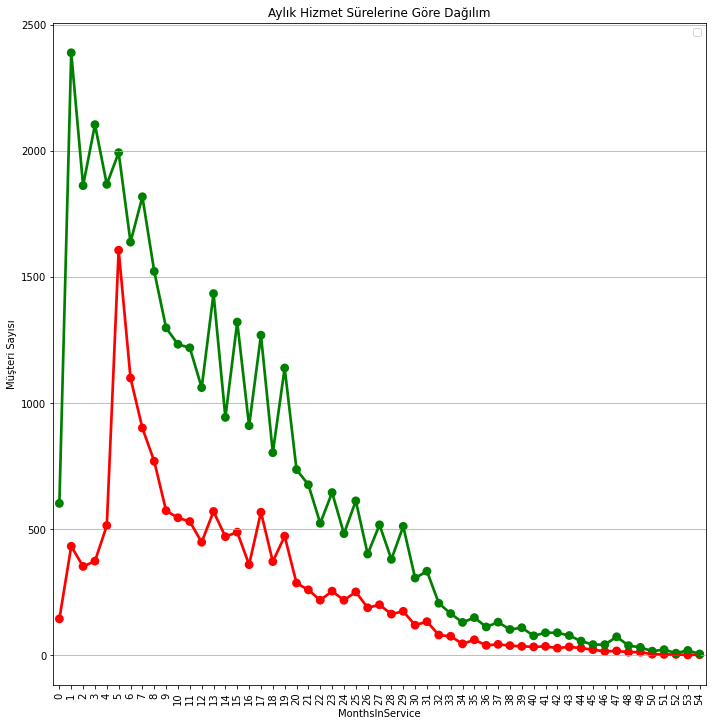

In [ ]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_x, color='red',label='Churn customer')
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_y, color='blue',label='Non Churn customer')
plt.xticks(rotation=90)
plt.ylabel("Müşteri Sayısı")
plt.xlabel("MonthsInService")
plt.legend()
plt.tight_layout()
plt.title('Aylık Hizmet Sürelerine Göre Dağılım')
plt.show()

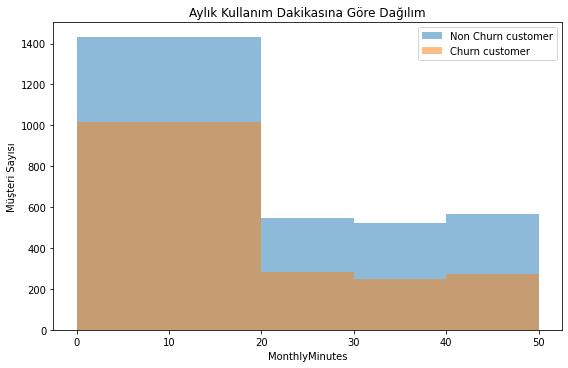

In [ ]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5,label='Churn customer')
plt.ylabel("Müşteri Sayısı")
plt.xlabel("MonthlyMinutes")
plt.legend()
plt.tight_layout()
plt.title('Aylık Kullanım Dakikasına Göre Dağılım')
plt.show()

In [ ]:
train['HandsetPrice'] = train['HandsetPrice'].replace('Unknown', np.nan)
test['HandsetPrice'] = test['HandsetPrice'].replace('Unknown', np.nan)

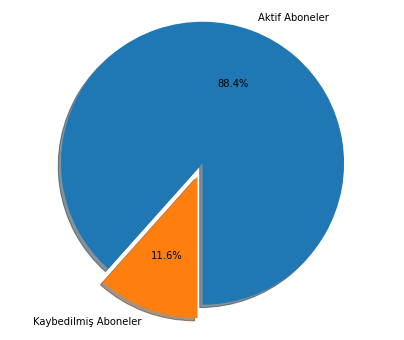

In [ ]:
#Müşteri birden fazla aboneliğe sahip olabilir ve aboneliklerden birini kapatabilir. 

train['ChurnSubs']=train['UniqueSubs']-train['ActiveSubs']

#Veri kümesinde abonelik kaybını (ChurnSubs) gösteren sütun yok.
#Müşterinin sahip olduğu abonelik sayısından aktif abonelikler çıkarıldığında bu sütun elde edilir.

slices=[train['ActiveSubs'].sum(),train['ChurnSubs'].sum()] 
labels=['Aktif Aboneler','Kaybedilmiş Aboneler']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

#Kaç abone aktif olduğunu ve kaçının aboneyi kaybettiğini göstermek için pasta grafiği kullanın

Müşteri hizmetlerini arayan müşteri sayısı : 1745
Aramayı yaptıktan sonra kaybedilen müşteri sayısı : 786
Aramayı yaptıktan sonra kaybedilmeyen müşteri sayısı : 959
Bekletme çağrılarılarının başarı oranı % : 55


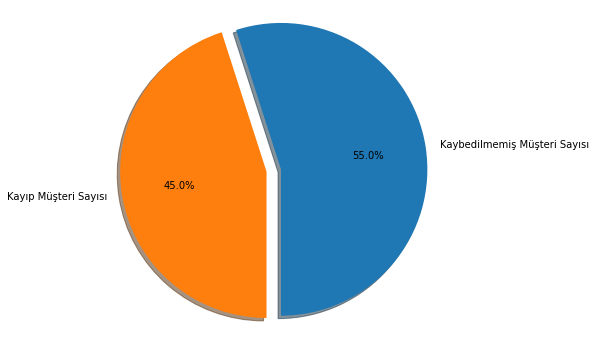

In [ ]:
retention_df=train[train['MadeCallToRetentionTeam']=='Yes']
print ("Müşteri hizmetlerini arayan müşteri sayısı : {}".format(train[train['MadeCallToRetentionTeam']=='Yes'].shape[0]))
print("Aramayı yaptıktan sonra kaybedilen müşteri sayısı : {}".format(train[(train['MadeCallToRetentionTeam']=='Yes') & (train['Churn']=='Yes')].shape[0]))
print("Aramayı yaptıktan sonra kaybedilmeyen müşteri sayısı : {}".format(train[(train['MadeCallToRetentionTeam']=='Yes') & (train['Churn']=='No')].shape[0]))
print ("Bekletme çağrılarılarının başarı oranı % : {}".format(round(100*560/1017)))

slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Kaybedilmemiş Müşteri Sayısı','Kayıp Müşteri Sayısı']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


In [ ]:
retention_offer=train[train['RetentionOffersAccepted']>0]

Bekletme çağrı teklifini kabul eden müşteri sayısı : 881
Bekletme çağrısını kabul ettikten sonra kaybedilen müşteri sayısı : 362
Bekletme çağrısını kabul ettikten sonra kaybedilmeyen müşteri sayısı : 519
Bekletme çağrısının teklifindeki başarı oranı : 0.5891032917139614


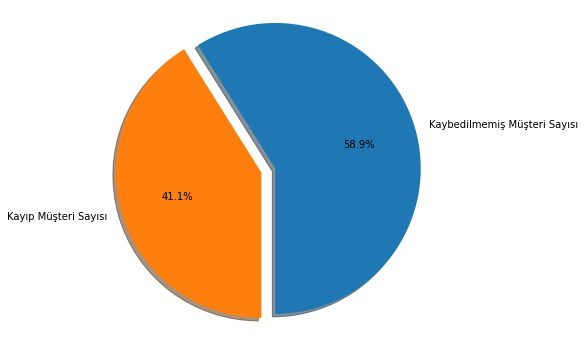

In [ ]:
print("Bekletme çağrı teklifini kabul eden müşteri sayısı : {}".format(retention_offer.shape[0]))
print("Bekletme çağrısını kabul ettikten sonra kaybedilen müşteri sayısı : {}".format(retention_offer[retention_offer['Churn']=='Yes'].shape[0]))
print("Bekletme çağrısını kabul ettikten sonra kaybedilmeyen müşteri sayısı : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]))
print("Bekletme çağrısının teklifindeki başarı oranı : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]/retention_offer.shape[0]))

slices=[retention_offer[retention_offer['Churn']=='No'].shape[0],retention_offer[retention_offer['Churn']=='Yes'].shape[0]]
labels=['Kaybedilmemiş Müşteri Sayısı','Kayıp Müşteri Sayısı']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()



In [ ]:
 df.plot( 
    x = , 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 

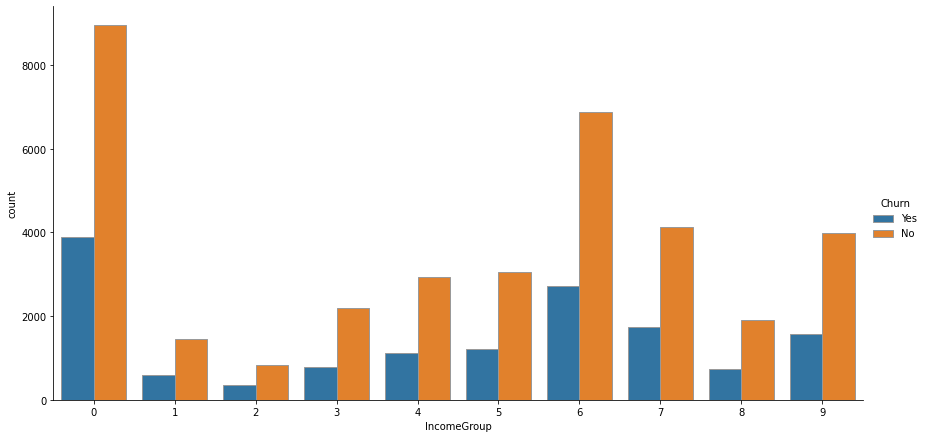

In [ ]:
sns.catplot(x="IncomeGroup", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=6, aspect=2)

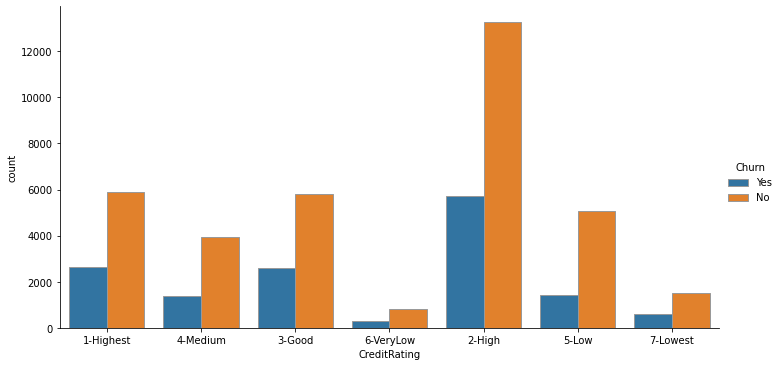

In [ ]:
sns.catplot(x="CreditRating", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=5, aspect=2)

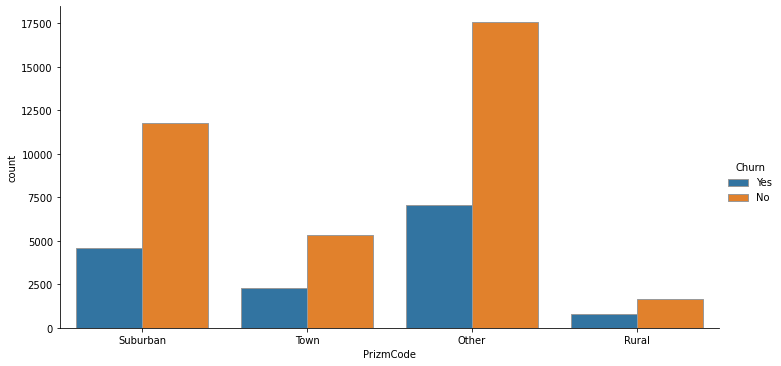

In [ ]:
sns.catplot(x="PrizmCode", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=5, aspect=2)


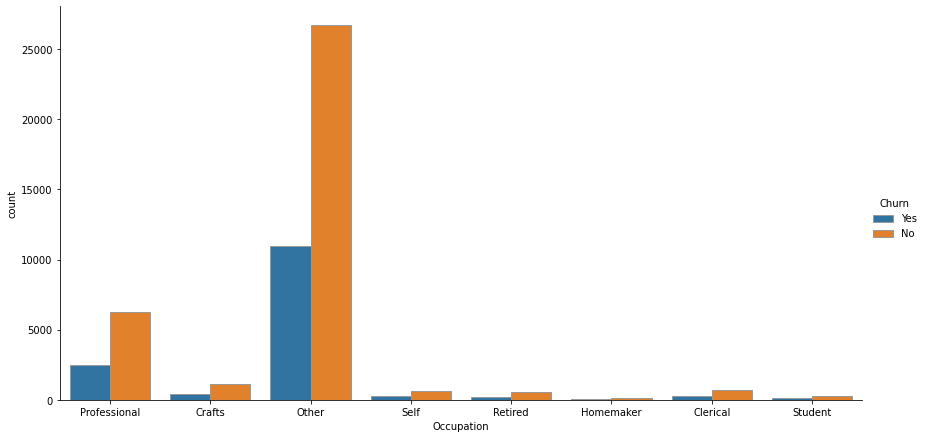

In [ ]:
sns.catplot(x="Occupation", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=6, aspect=2)


In [ ]:
print("Kategorik Değişkenler : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numerik Değişkenler : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Kategorik Değişkenler : Index(['Churn', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus', 'ChurnSubs'],
      dtype='object')
Numerik Değişkenler : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'Rece

# Kayıp Değişkenler Üzerinde Çalışma

In [ ]:
train.columns[train.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'],
      dtype='object')

In [ ]:
test.columns[test.isnull().any()]

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],
      dtype='object')

In [ ]:
train_missings=train.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'], axis=1)

In [ ]:
test_missings=test.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],axis=1)

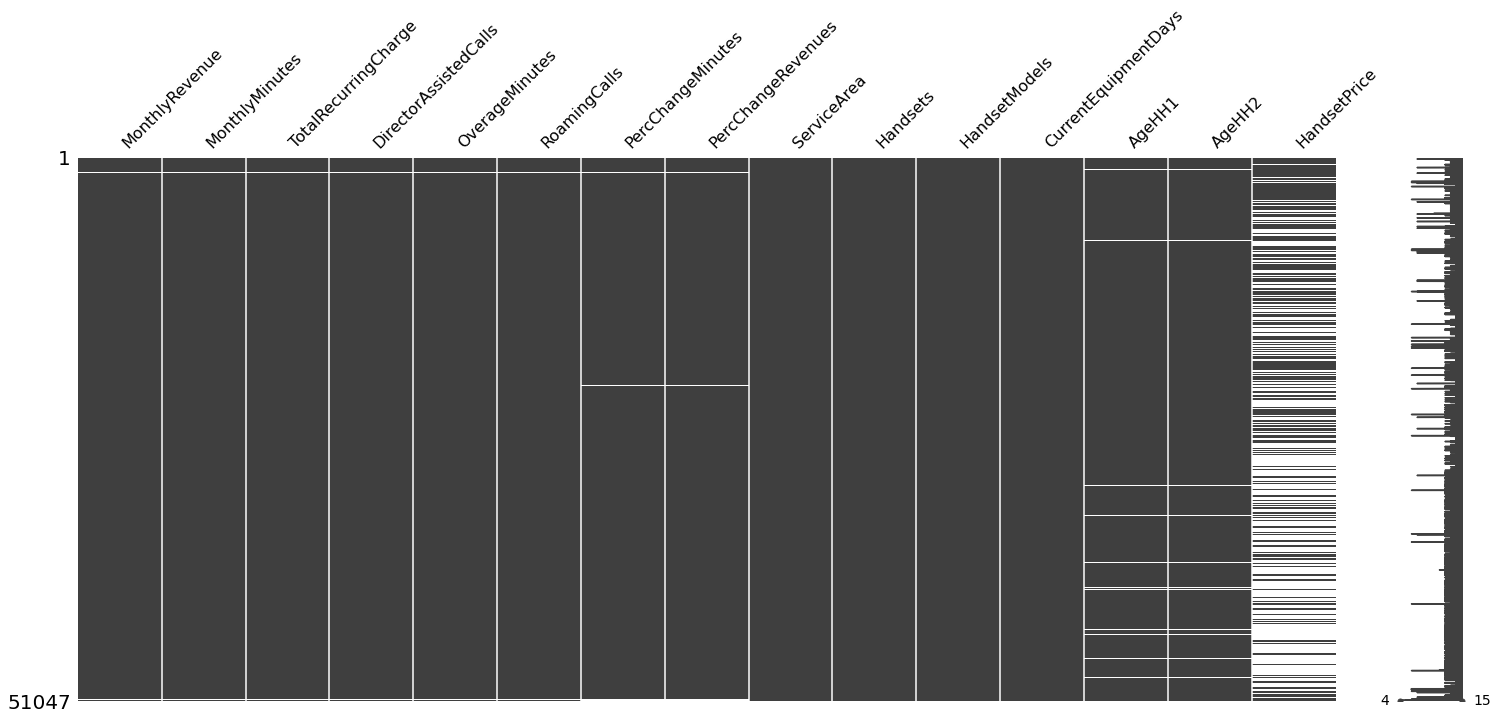

In [ ]:
msno.matrix(train_missings)

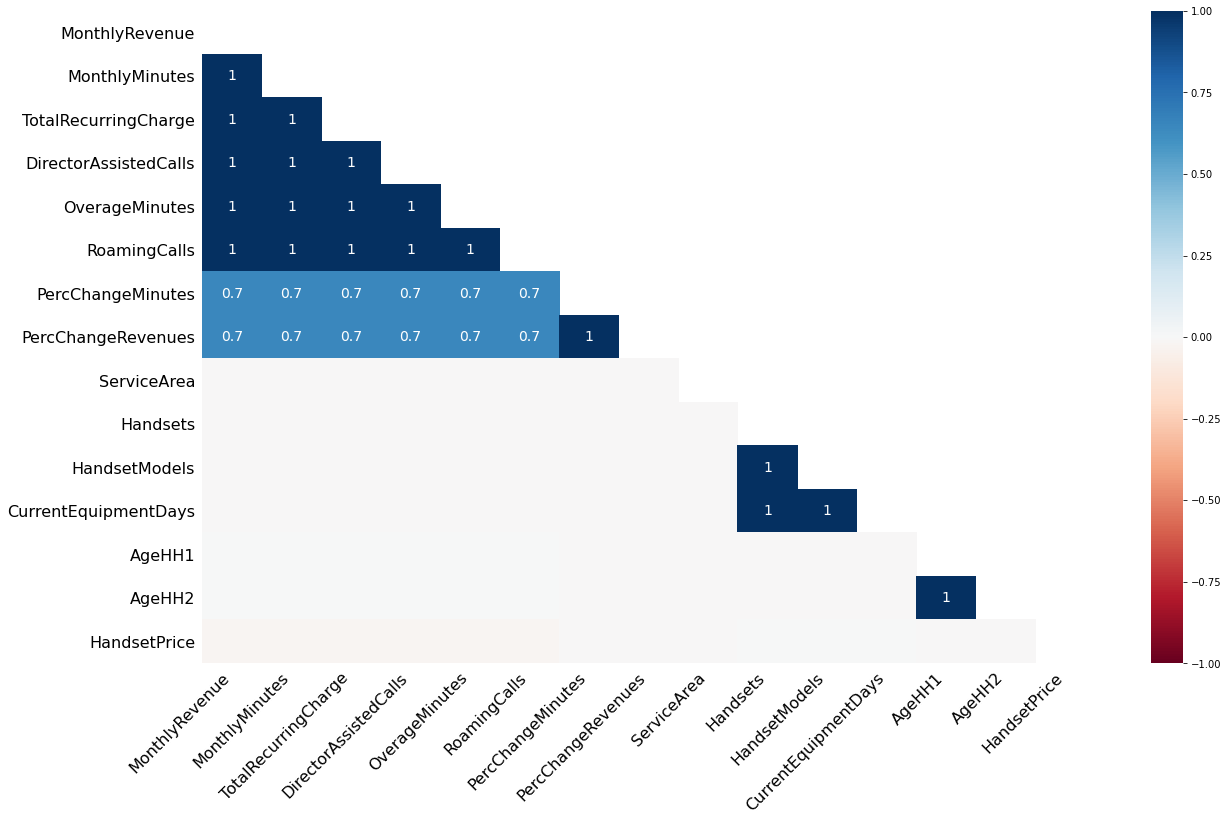

In [ ]:
msno.heatmap(train_missings) #A value near -1 means if one variable appears then the other variable is very likely to be missing.
                    #A value near 0 means there is no dependence between the occurrence of missing values of two variables.
                    #A value near 1 means if one variable appears then the other variable is very likely to be present.


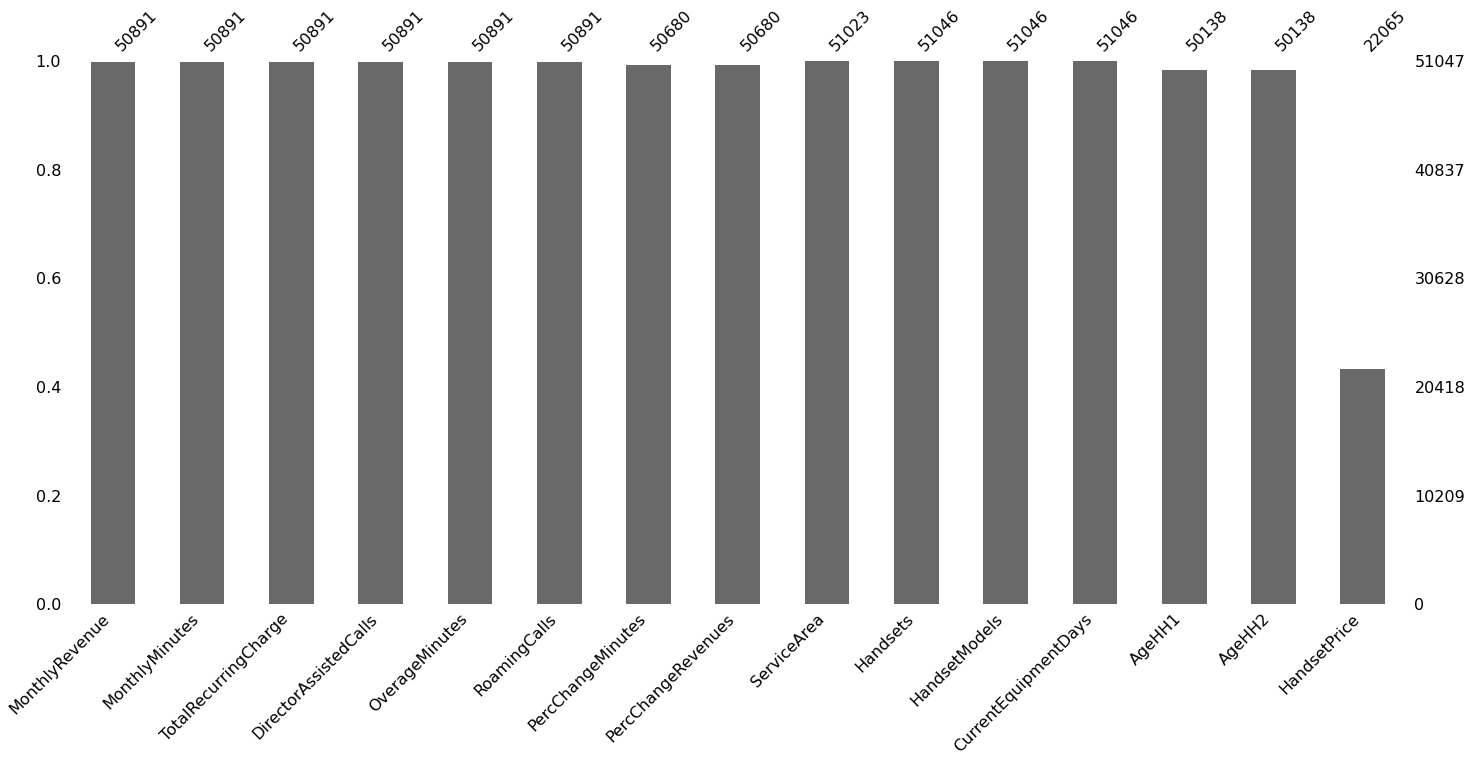

In [ ]:
msno.bar(train_missings);

In [ ]:
train_missings.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,1.805646,1.558751,380.545841,31.338127,21.144142
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,1.331173,0.905932,253.801982,22.094635,23.931368
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,1.000000,1.000000,-5.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,1.000000,1.000000,205.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,1.000000,1.000000,329.000000,36.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,2.000000,2.000000,515.000000,48.000000,42.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,24.000000,15.000000,1812.000000,99.000000,99.000000


In [ ]:
def values_table(train_missings):
        mis_val = train_missings.isnull().sum()
        mis_val_percent = 100 * train_missings.isnull().sum() / len(train_missings)
        mean=train_missings.mean()
        median=train_missings.median()
        total=train_missings.count()
        zeros=train_missings[train_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Train Missing Values', 1 : '% of Train Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = train_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Train Total Values', ascending=False).round(1)
        print ("Veri setinin içinde " + str(train.shape[1]) + " sütun ve " + str(train.shape[0]) + " satır vardır.\n"      
            "Bu sütunlardan " + str(table.shape[0]) +" tanesinde kayıp değerler bulunmaktadır.")
        return table

values_table(train_missings)

Veri setinin içinde 58 sütun ve 51047 satır vardır.
Bu sütunlardan 15 tanesinde kayıp değerler bulunmaktadır.


,Train Missing Values,% of Train Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,28982,56.8,NaN,60.0,22065,0,object
AgeHH1,909,1.8,31.3,36.0,50138,13917,float64
AgeHH2,909,1.8,21.1,0.0,50138,26087,float64
PercChangeMinutes,367,0.7,-11.5,-5.0,50680,1124,float64
PercChangeRevenues,367,0.7,-1.2,-0.3,50680,5818,float64
MonthlyRevenue,156,0.3,58.8,48.5,50891,6,float64
MonthlyMinutes,156,0.3,525.7,366.0,50891,723,float64
TotalRecurringCharge,156,0.3,46.8,45.0,50891,160,float64
DirectorAssistedCalls,156,0.3,0.9,0.2,50891,24512,float64
OverageMinutes,156,0.3,40.0,3.0,50891,23262,float64


In [ ]:
def values_table(test_missings):
        mis_val = test_missings.isnull().sum()
        mis_val_percent = 100 * test_missings.isnull().sum() / len(test_missings)
        mean=test_missings.mean()
        median=test_missings.median()
        total=test_missings.count()
        zeros=test_missings[test_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Test Missing Values', 1 : '% of Test Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = test_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Test Total Values', ascending=False).round(1)
        print ("Dataframe'in içinde " + str(train.shape[1]) + " sütun ve " + str(train.shape[0]) + " satır vardır.\n"      
            "Bu sütunlardan " + str(table.shape[0]) +" tanesinde missing value bulunmaktadır.")
        return table

values_table(test_missings)

Dataframe'in içinde 58 sütun ve 51047 satır vardır.
Bu sütunlardan 12 tanesinde missing value bulunmaktadır.


,Test Missing Values,% of Test Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,11267,56.3,NaN,80.0,8733,0,object
AgeHH1,335,1.7,31.5,36.0,19665,5400,float64
AgeHH2,335,1.7,21.2,0.0,19665,10191,float64
PercChangeMinutes,135,0.7,-9.1,-4.0,19865,429,float64
PercChangeRevenues,135,0.7,-1.2,-0.3,19865,2282,float64
MonthlyRevenue,60,0.3,58.9,48.7,19940,2,float64
MonthlyMinutes,60,0.3,525.9,365.0,19940,294,float64
TotalRecurringCharge,60,0.3,46.9,45.0,19940,59,float64
DirectorAssistedCalls,60,0.3,0.9,0.2,19940,9593,float64
OverageMinutes,60,0.3,40.2,2.0,19940,9198,float64


In [ ]:
train_1=train.copy()
test_1=test.copy()

In [ ]:
churn=train_1[train_1['Churn']=='Yes']
non_churn= train_1[train_1['Churn']=='No']
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14462.000000,14462.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,26.495745,1.584597,0.255040,105.000598,23.591720,7.281483,83.947312,61.705717,9.833696,0.010924,1.615335,19.044321,1.598532,1.370811,1.736932,1.501733,421.903881,30.306043,20.445927,0.058392,0.026103,0.046904,4.261845,0.043641,0.227721
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,38.813907,4.416373,0.946045,157.854091,33.992748,15.160954,98.218936,86.263566,15.168911,0.447215,4.774239,9.336919,1.852533,0.761329,1.262219,0.863085,259.940076,22.013043,23.536945,0.258222,0.169771,0.240896,3.164527,0.297278,1.318878
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,4.300000,0.000000,0.000000,5.800000,2.300000,0.000000,18.700000,8.700000,1.700000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,14.700000,0.000000,0.000000,44.900000,12.000000,1.700000,57.700000,31.300000,5.300000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,366.000000,34.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,34.000000,1.300000,0.300000,140.500000,31.700000,8.000000,114.300000,80.300000,12.150000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,564.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,848.700000,172.300000,30.000000,2619.300000,520.300000,298.300000,1359.000000,1313.700000,328.700000,33.700000,135.700000,61.000000,196.000000,53.000000,22.000000,14.000000,1779.000000,98.000000,99.000000,4.000000,3.000000,9.000000,9.000000,9.000000,143.000000


In [ ]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36335.000000,36335.000000,36335.000000,35676.000000,35676.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,29.014991,1.984142,0.316570,118.767558,26.100793,8.541111,93.222485,70.057714,10.289303,0.012825,1.931666,18.639641,1.505284,1.347672,1.833466,1.581836,363.801156,31.756503,21.427178,0.028622,0.015109,0.054161,4.349901,0.058069,0.157612
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,38.878401,5.342580,1.246612,169.697119,35.664862,17.224768,107.437927,95.149817,15.707310,0.644205,5.879328,9.979326,0.843058,0.637329,1.357123,0.921723,249.334338,22.114216,24.083977,0.180685,0.129644,0.330772,3.127216,0.412795,0.486571
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,5.700000,0.000000,0.000000,9.600000,3.700000,0.000000,24.700000,12.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,16.700000,0.000000,0.000000,56.000000,14.000000,2.300000,63.700000,37.700000,5.700000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,310.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,37.300000,1.700000,0.300000,158.600000,34.700000,9.700000,124.300000,91.700000,12.700000,0.000000,1.700000,24.000000,2.000000,2.000000,2.000000,2.000000,493.000000,48.000000,44.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,840.000000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,60.000000,12.000000,11.000000,24.000000,15.000000,1812.000000,99.000000,98.000000,3.000000,3.000000,35.000000,9.000000,25.000000,10.000000


In [ ]:
# Gelir Dağılımına göre Churn olup olmama durumu etkileniyor bu yüzden eksik değerleri filtreleyerek doldurduk 
train_1['MonthlyRevenue'].fillna(train_1.groupby('Churn')['MonthlyRevenue'].transform('median'), inplace=True)

In [ ]:
test_1['MonthlyRevenue'].fillna(test_1['MonthlyRevenue'].mean(),inplace=True)

In [ ]:
#Çok fazla Bilinmeyen değişken var (%56.4) bu yüzden drop ettik

train_1.drop('HandsetPrice',axis=1, inplace=True)
test_1.drop('HandsetPrice',axis=1, inplace=True)

In [ ]:
#RetentionCalls yapılan bekletme çağrılarının sayısını veriyor (MadeCallToRetentionTeam=Yes) dolayısıyla bu sütuna gerek yok

train_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)
test_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)

In [ ]:
train_1.drop('MaritalStatus',axis=1, inplace=True)
test_1.drop('MaritalStatus',axis=1, inplace=True)

In [ ]:
train_1.drop('Homeownership',axis=1, inplace=True)
test_1.drop('Homeownership',axis=1, inplace=True)

In [ ]:
#HandsetModels ve Handsets numeric gözükmesine rağmen kategorik değişkenler.Bu yüzden mode ile doldurmak daha doğru

train_1[train_1['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']] 


,HandsetModels,Handsets,CurrentEquipmentDays
38702,NaN,NaN,NaN


In [ ]:
print("Handsets:",train_1.Handsets.mode()[0])
print("HandsetModels:",train_1.HandsetModels.mode()[0])
print("CurrentEquipmentDays:",train_1.CurrentEquipmentDays.mode()[0])

Handsets: 1.0
HandsetModels: 1.0
CurrentEquipmentDays: 202.0


In [ ]:
train_1['Handsets'].fillna(train_1['Handsets'].mode()[0],inplace=True)

In [ ]:
train_1['HandsetModels'].fillna(train_1['HandsetModels'].mode()[0],inplace=True)

In [ ]:
train_1['CurrentEquipmentDays'].value_counts()

202.0     159
313.0     156
212.0     149
199.0     147
308.0     147
         ... 
1515.0      1
1397.0      1
1712.0      1
1724.0      1
1310.0      1
Name: CurrentEquipmentDays, Length: 1438, dtype: int64

In [ ]:
train_1['CurrentEquipmentDays'].fillna(train_1['CurrentEquipmentDays'].mode()[0],inplace=True)

In [ ]:
train_1['ServiceArea'].fillna(train_1['ServiceArea'].mode()[0],inplace=True)
test_1['ServiceArea'].fillna(test_1['ServiceArea'].mode()[0],inplace=True)

In [ ]:
train_1['AgeHH1'].fillna(value=0,inplace=True)
test_1['AgeHH1'].fillna(value=0,inplace=True)

In [ ]:
train_1['AgeHH2'].fillna(value=0,inplace=True)
test_1['AgeHH2'].fillna(value=0,inplace=True)

In [ ]:
display(train_1.groupby(['Churn'],as_index=False)['MonthlyMinutes'].median().style.hide_index())

Churn,MonthlyMinutes
No,381.000000
Yes,330.000000


In [ ]:
train_1['MonthlyMinutes'].fillna(train_1.groupby('Churn')['MonthlyMinutes'].transform('median'), inplace=True)

In [ ]:
test_1['MonthlyMinutes'].fillna(test_1['MonthlyMinutes'].median(), inplace=True)

In [ ]:
train_1['TotalRecurringCharge'].fillna(train_1['TotalRecurringCharge'].median(),inplace=True)
test_1['TotalRecurringCharge'].fillna(test_1['TotalRecurringCharge'].median(),inplace=True)

In [ ]:
train_1['PercChangeRevenues'].fillna(train_1['PercChangeRevenues'].median(),inplace=True)
test_1['PercChangeRevenues'].fillna(test_1['PercChangeRevenues'].median(),inplace=True)

In [ ]:
train_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)
test_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)

In [ ]:
train_1['RoamingCalls'].fillna(value=0,inplace=True)
test_1['RoamingCalls'].fillna(value=0,inplace=True)

In [ ]:
train_1['OverageMinutes'].fillna(value=0,inplace=True)
test_1['OverageMinutes'].fillna(value=0,inplace=True)

In [ ]:
train_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)
test_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [ ]:
train_1.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

# Aykırı Değerlerin Tespiti

In [ ]:
print ("Eğitim veri setinin içinde " + str(train_1.shape[1]) + " sütun ve " + str(train_1.shape[0]) + " satır vardır.\n")
print("Test veri setinin içinde " + str(test_1.shape[1]) + " sütun ve " + str(test_1.shape[0]) + " satır vardır.\n")

Eğitim veri setinin içinde 54 sütun ve 51047 satır vardır.

Test veri setinin içinde 54 sütun ve 20000 satır vardır.



In [ ]:
print ("Eğitim veri setinin içinde " + str(train.shape[1]) + " sütun ve " + str(train.shape[0]) + " satır vardır.\n")
print("Test veri setinin içinde " + str(test.shape[1]) + " sütun ve " + str(test.shape[0]) + " satır vardır.\n")

Eğitim veri setinin içinde 58 sütun ve 51047 satır vardır.

Test veri setinin içinde 58 sütun ve 20000 satır vardır.



In [ ]:
from scipy.stats import zscore
from scipy import stats 

train_yeni=train_1.select_dtypes(include=['int', 'float'])
train_yeni.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,2.0,2.0,361.0,62.0,0.0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,2.0,1.0,1504.0,40.0,42.0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,1.0,1.0,1812.0,26.0,26.0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,9.0,4.0,458.0,30.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,852.0,46.0,54.0


In [ ]:
train_new = train_yeni.copy()
outliers={}
for col in train_yeni:
    z_score = zscore(train_yeni[col])
    upper_replace_value = train_yeni[z_score<=3][col].max()
    lower_replace_value = train_yeni[z_score>=-3][col].min()
    train_new = train_yeni.copy()
    outliers[col] = len(train_new[col][(train_new[col] > upper_replace_value)| (train_new[col] < lower_replace_value)])

In [ ]:
outliers_zscore=pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
outliers_zscore

,Feature,Outliers
0,MonthlyRevenue,880
1,MonthlyMinutes,914
2,TotalRecurringCharge,541
3,DirectorAssistedCalls,837
4,OverageMinutes,901
5,RoamingCalls,315
6,PercChangeMinutes,1102
7,PercChangeRevenues,841
8,DroppedCalls,987
9,BlockedCalls,819


In [ ]:
train_new1 = train_yeni.copy()
outliers_1={}
for col in train_yeni:
    q1 = train_yeni[col].quantile(q=0.15)
    q3 = train_yeni[col].quantile(q=0.85)
    iqr = stats.iqr(train_yeni[col]) 
    train_new1 = train_yeni.copy()
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outliers_1[col] = len(train_new1[col][(train_new1[col] > upper_limit)| (train_new1[col] < lower_limit)])

In [ ]:
outliers_iqr=pd.DataFrame(outliers_1.items(),columns=['Feature','Outliers'])
outliers_iqr

,Feature,Outliers
0,MonthlyRevenue,2157
1,MonthlyMinutes,1553
2,TotalRecurringCharge,560
3,DirectorAssistedCalls,3920
4,OverageMinutes,4000
5,RoamingCalls,6659
6,PercChangeMinutes,4947
7,PercChangeRevenues,9679
8,DroppedCalls,2524
9,BlockedCalls,3966


In [ ]:
train_new2 = train_yeni.copy()
outliers_2={}
for col in train_yeni:
    lower_lim = train_yeni[col].quantile(q=0.01)
    upper_lim = train_yeni[col].quantile(q=0.99)
    outliers_2[col] = len(train_new2[col][(train_new2[col] > upper_lim)| (train_new2[col] < lower_lim)])

In [ ]:
outliers_hard=pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
outliers_hard

,Feature,Outliers
0,MonthlyRevenue,935
1,MonthlyMinutes,511
2,TotalRecurringCharge,975
3,DirectorAssistedCalls,490
4,OverageMinutes,511
5,RoamingCalls,510
6,PercChangeMinutes,1021
7,PercChangeRevenues,1022
8,DroppedCalls,493
9,BlockedCalls,510


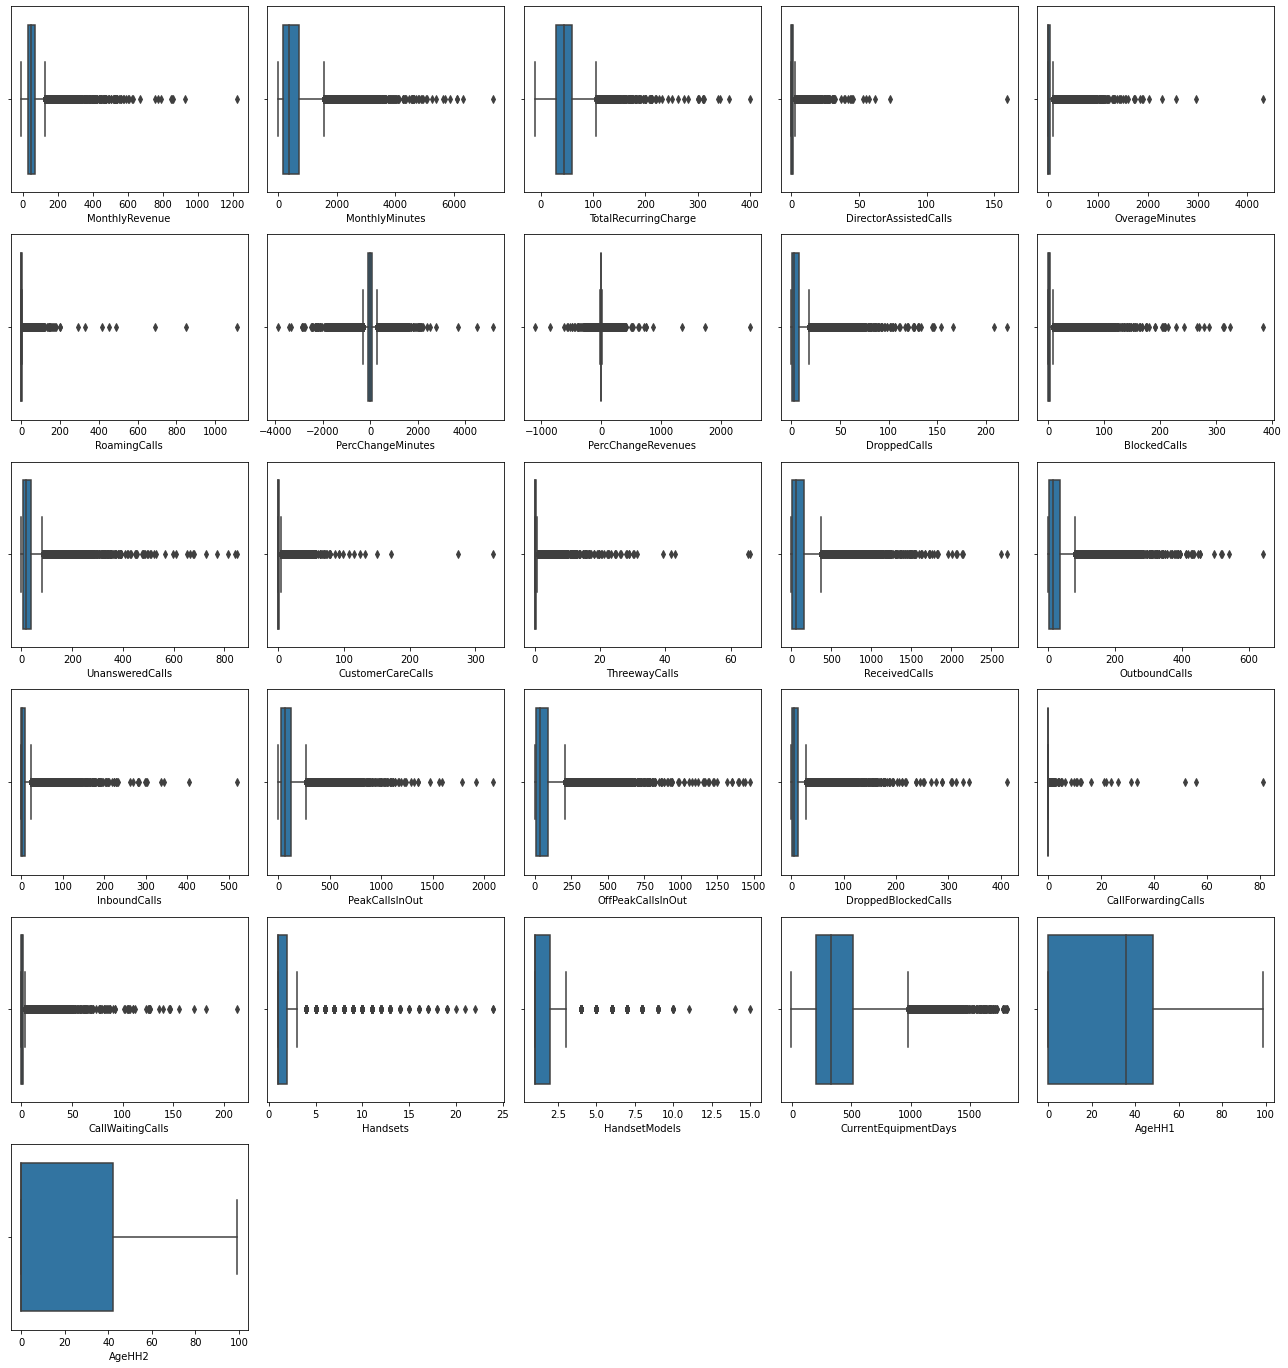

In [ ]:
plt.figure(figsize=(18,25))
for num,col in enumerate(train_yeni.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(train_yeni[col])
    plt.tight_layout()

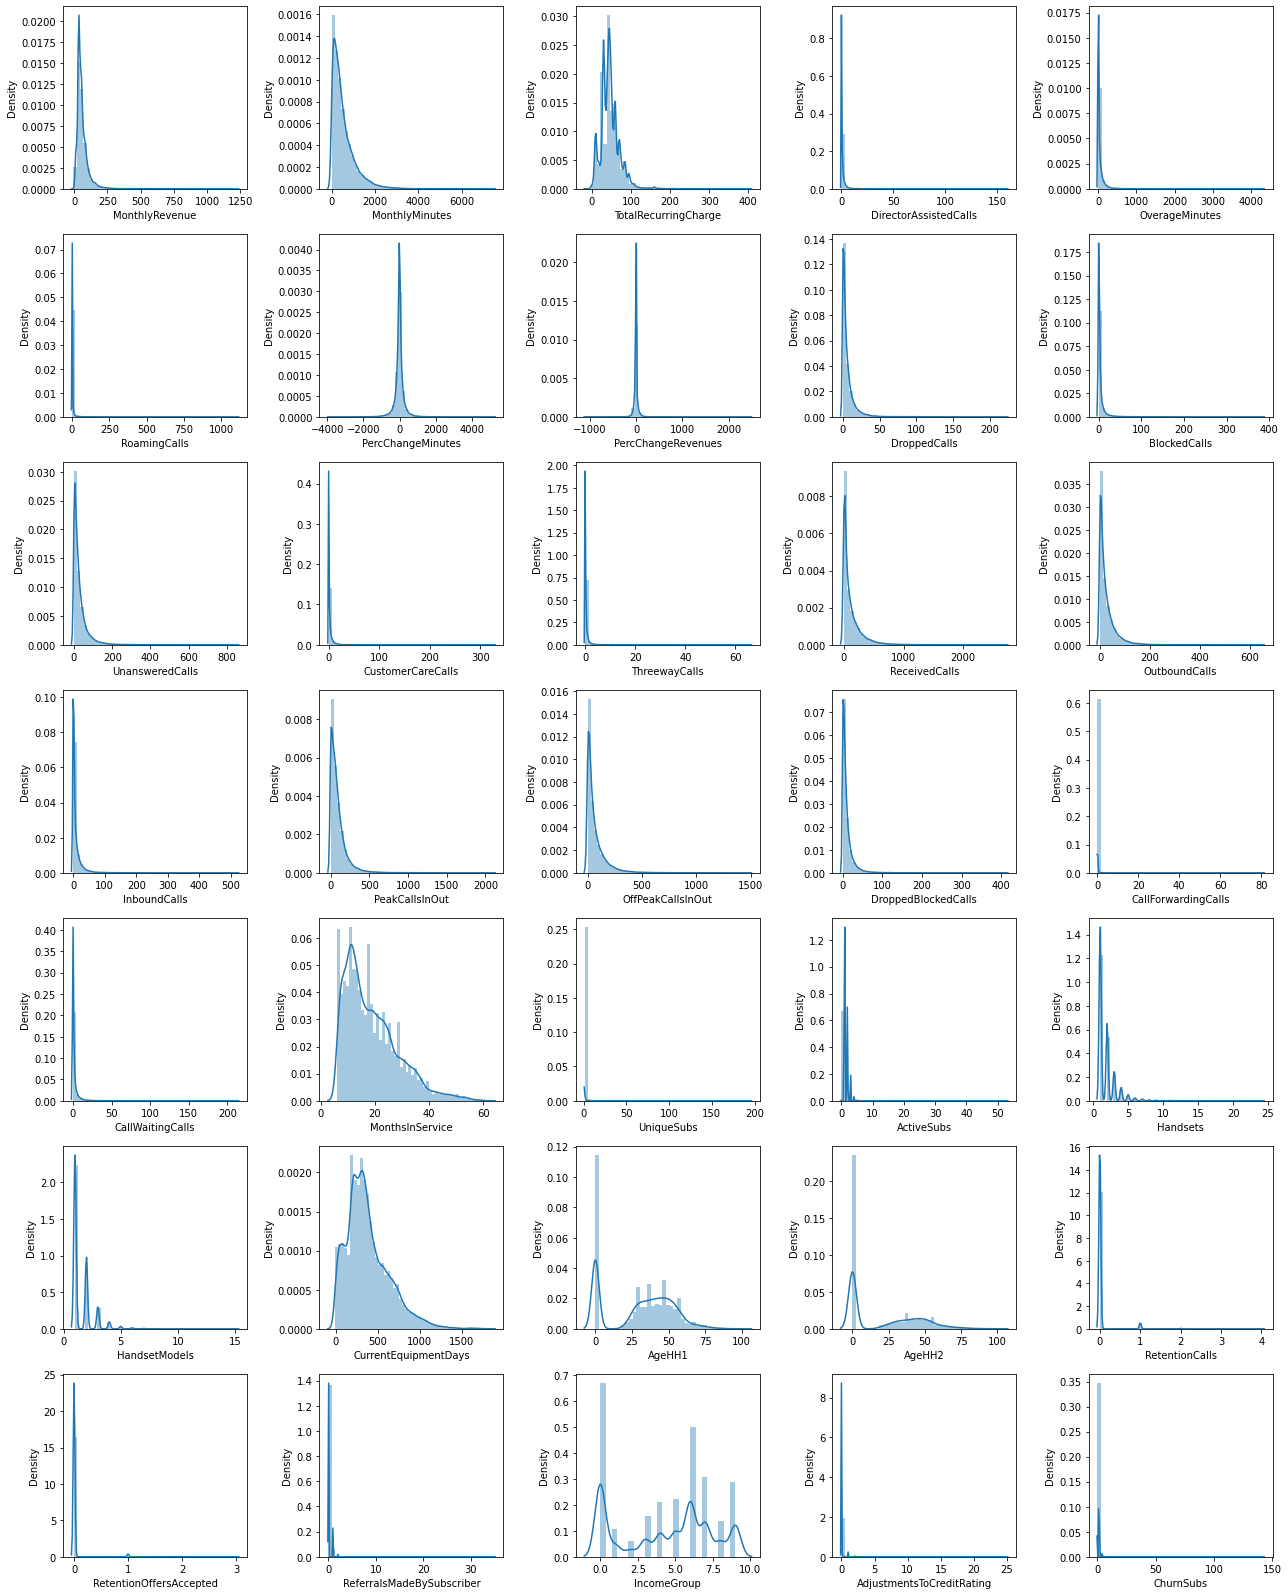

In [ ]:
plt.figure(figsize=(18,25))
for num,col in enumerate(train_1.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.distplot(train_1[col])
    plt.tight_layout()

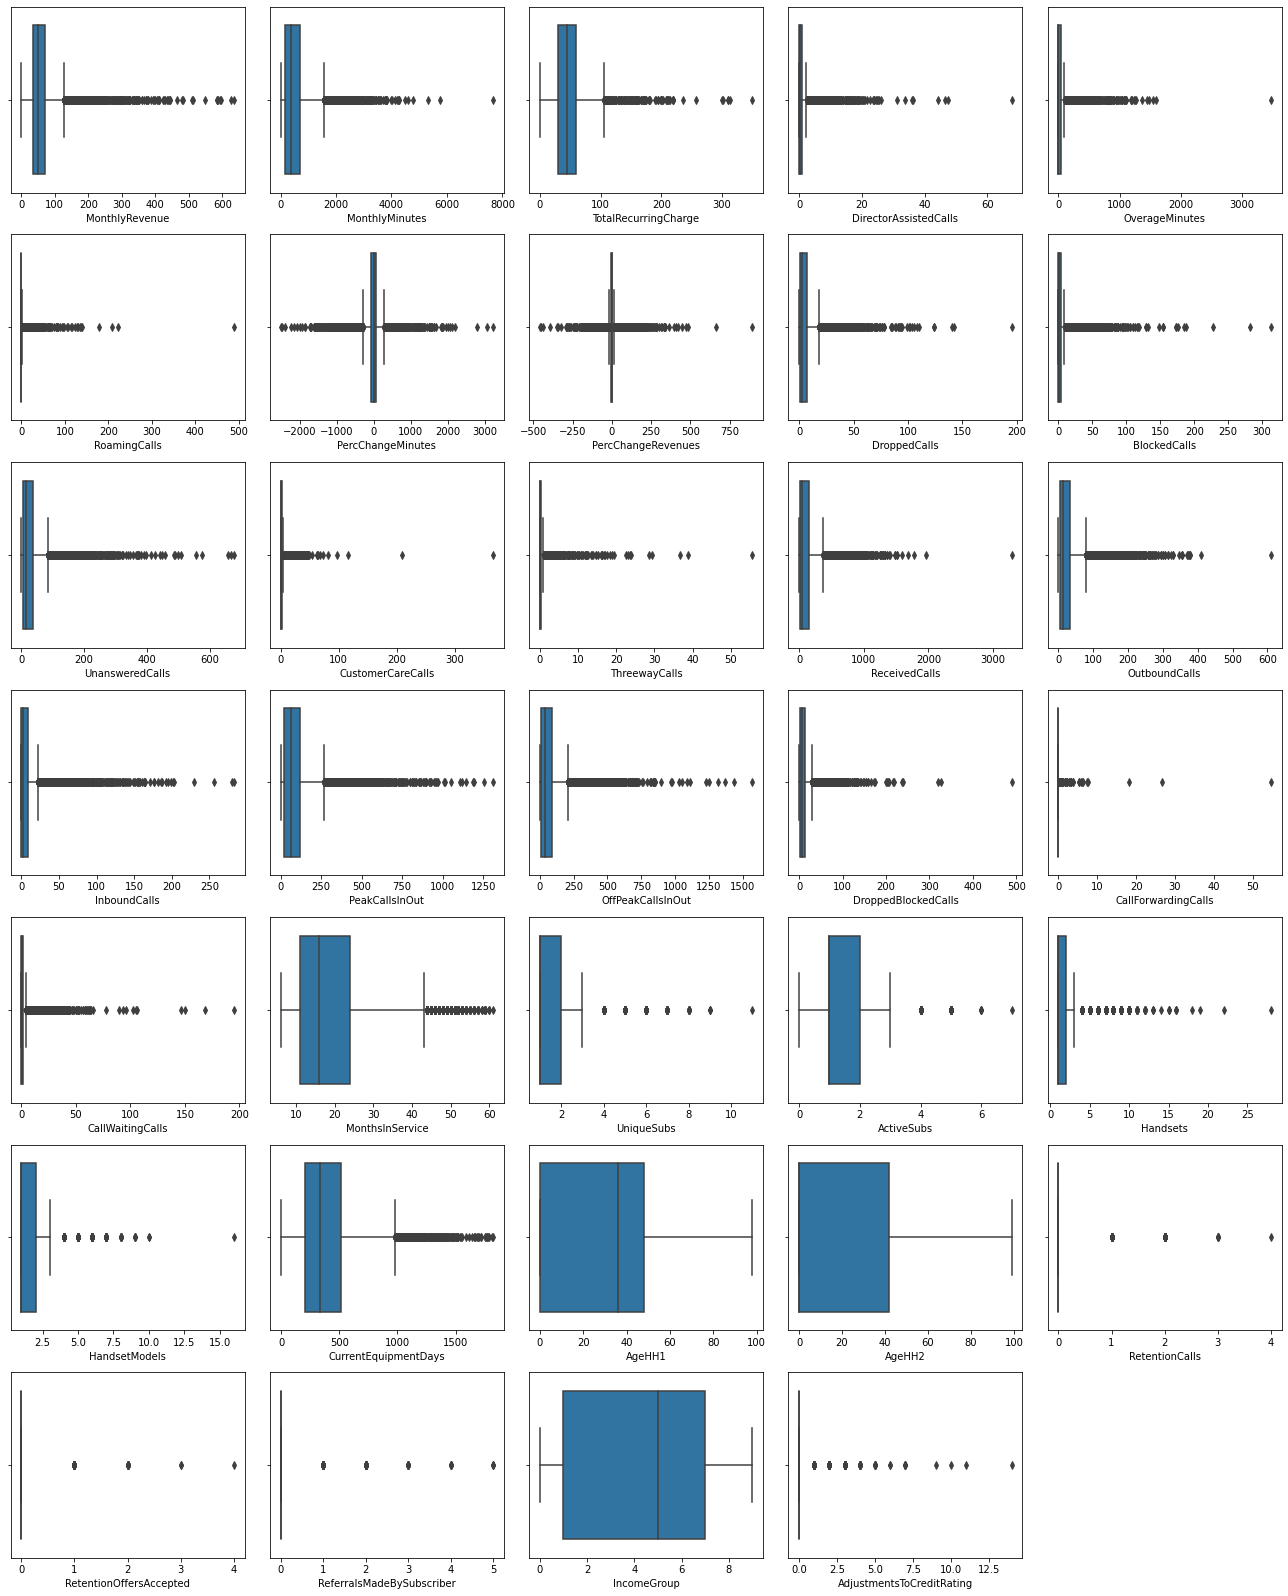

In [ ]:
test_1 = test_1.drop(columns=['Churn','CustomerID'], axis=1)

plt.figure(figsize=(18,25))
for num,col in enumerate(test_1.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(test_1[col])
    plt.tight_layout()

In [ ]:
train_df=train_1.copy()
for i in train_df.columns:
      if train_df[i].dtype=='object':
            print(pd.DataFrame(train_df[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1708
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
PHISCR717            1
ATLOVB601            1
NMXLSA505            1
OHHCLA304            1
SLUSTG435            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     HasCreditCard
Yes          34503
No           16544
     NewCellphoneUs

In [ ]:
train_1.drop('ServiceArea',axis=1, inplace=True)
test_1.drop('ServiceArea',axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
def FunLabelEncoder(train_df):
    for c in train_df.columns:
        if train_df.dtypes[c] == object:
            enc.fit(train_df[c].astype(str))
            train_df[c] = enc.transform(train_df[c].astype(str))
    return train_df

In [ ]:
train_df = FunLabelEncoder(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int64  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [ ]:
test_df=test_1.copy()
enc = LabelEncoder()
def FunLabelEncoder(tes_df):
    for c in test_df.columns:
        if test_df.dtypes[c] == object:
            enc.fit(test_df[c].astype(str))
            test_df[c] = enc.transform(test_df[c].astype(str))
    return test_df

In [ ]:
test_df = FunLabelEncoder(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             20000 non-null  float64
 1   MonthlyMinutes             20000 non-null  float64
 2   TotalRecurringCharge       20000 non-null  float64
 3   DirectorAssistedCalls      20000 non-null  float64
 4   OverageMinutes             20000 non-null  float64
 5   RoamingCalls               20000 non-null  float64
 6   PercChangeMinutes          20000 non-null  float64
 7   PercChangeRevenues         20000 non-null  float64
 8   DroppedCalls               20000 non-null  float64
 9   BlockedCalls               20000 non-null  float64
 10  UnansweredCalls            20000 non-null  float64
 11  CustomerCareCalls          20000 non-null  float64
 12  ThreewayCalls              20000 non-null  float64
 13  ReceivedCalls              20000 non-null  flo

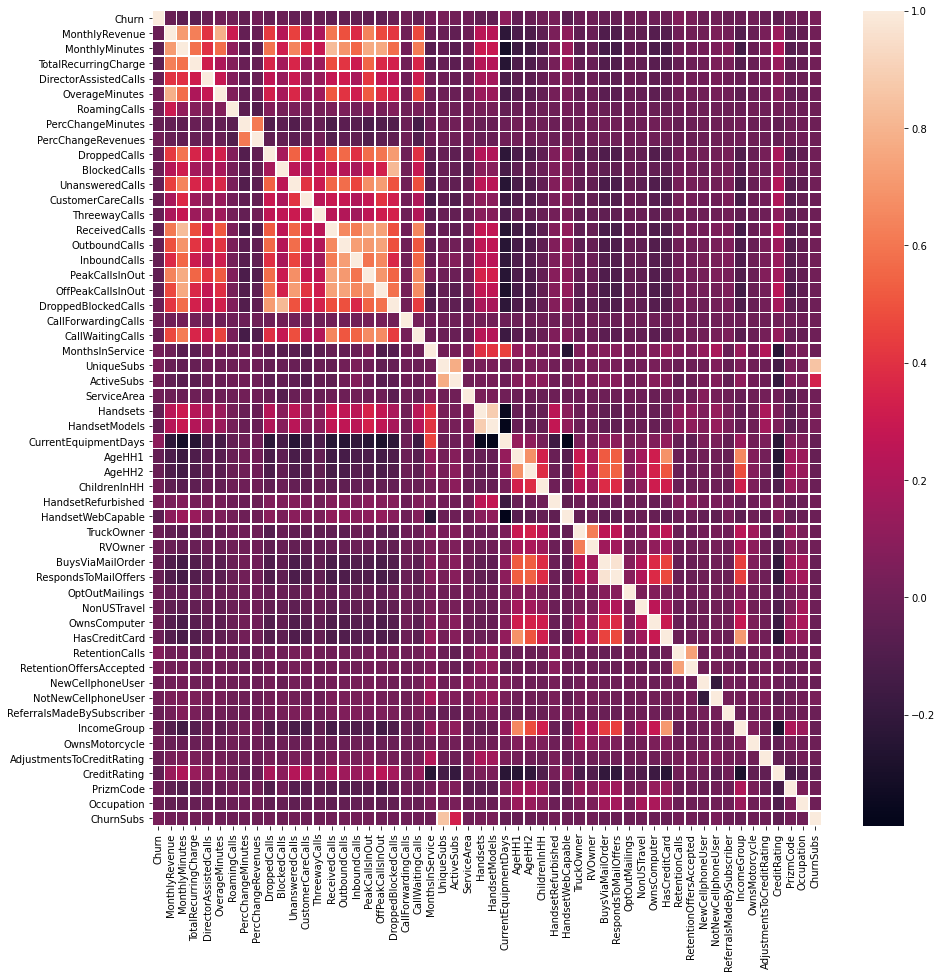

In [ ]:
cor = train_df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor, fmt=".4f", linewidths=0.5, ax=ax) 

In [ ]:
#fetaure selection cor matrisinden bakarak??

## Feature Scaling






In [ ]:
y = train_df['Churn']
X= train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,ChurnSubs
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,658,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,0,2,4,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,610,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,3,2,4,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,352,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,2,3,1,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,610,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,3,0,3,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,4,0


In [ ]:
y

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot



# Eğitim/Test Ayrımı

In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9,stratify=y)

columns = X_train.columns

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_over))

Counter({0: 29068, 1: 11769})
Counter({0: 11769, 1: 11769})


# Sınıflandırma Algoritmaları

In [ ]:
def run_exps(X_over , y_over, X_test, y_test):

  models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('AdaBoost',AdaBoostClassifier()),
          ('GradiendtBoost',GradientBoostingClassifier()),
           ('LightGB',lgb.LGBMClassifier())
        ]

  for name, model in models:

    clf = model.fit(os_data_X,os_data_y)
    y_pred = clf.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    print(name)
    sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 
    

    print(classification_report(y_test, y_pred))
   
run_exps(X_over , y_over, X_test, y_test)

LogReg


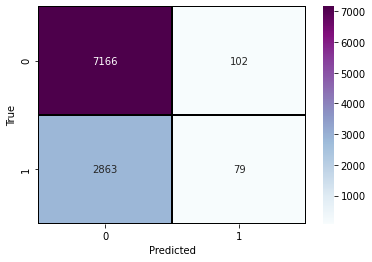

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      7268
           1       0.44      0.03      0.05      2942

    accuracy                           0.71     10210
   macro avg       0.58      0.51      0.44     10210
weighted avg       0.63      0.71      0.60     10210

RF


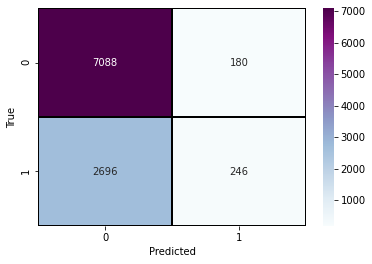

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7268
           1       0.58      0.08      0.15      2942

    accuracy                           0.72     10210
   macro avg       0.65      0.53      0.49     10210
weighted avg       0.68      0.72      0.63     10210

KNN


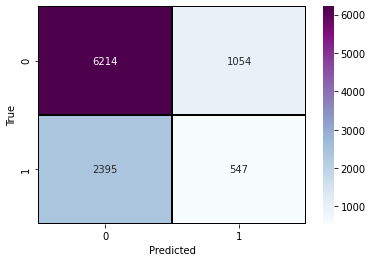

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      7268
           1       0.34      0.19      0.24      2942

    accuracy                           0.66     10210
   macro avg       0.53      0.52      0.51     10210
weighted avg       0.61      0.66      0.63     10210

GaussianNB


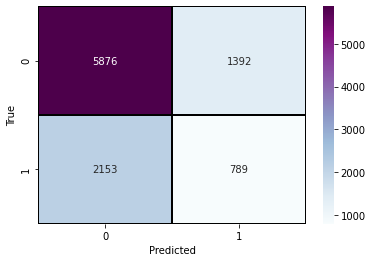

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7268
           1       0.36      0.27      0.31      2942

    accuracy                           0.65     10210
   macro avg       0.55      0.54      0.54     10210
weighted avg       0.63      0.65      0.64     10210

XGB


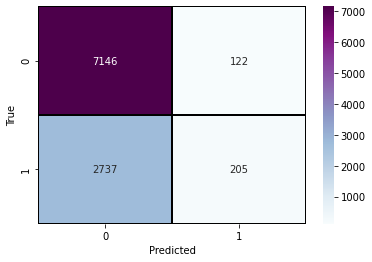

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7268
           1       0.63      0.07      0.13      2942

    accuracy                           0.72     10210
   macro avg       0.67      0.53      0.48     10210
weighted avg       0.70      0.72      0.63     10210

AdaBoost


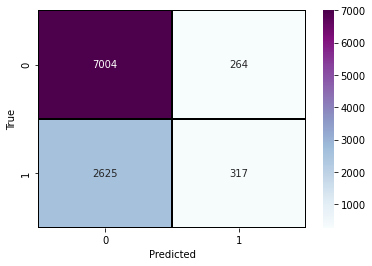

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7268
           1       0.55      0.11      0.18      2942

    accuracy                           0.72     10210
   macro avg       0.64      0.54      0.50     10210
weighted avg       0.68      0.72      0.64     10210

GradiendtBoost


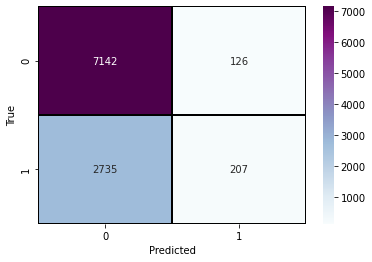

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7268
           1       0.62      0.07      0.13      2942

    accuracy                           0.72     10210
   macro avg       0.67      0.53      0.48     10210
weighted avg       0.69      0.72      0.63     10210

LightGB


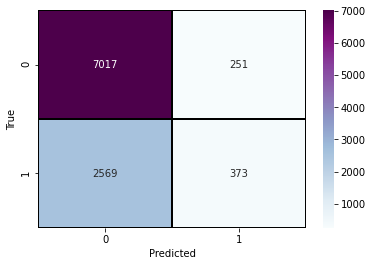

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      7268
           1       0.60      0.13      0.21      2942

    accuracy                           0.72     10210
   macro avg       0.66      0.55      0.52     10210
weighted avg       0.69      0.72      0.65     10210



In [ ]:
def run_exps(X_train , y_train, X_test, y_test):

  models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('AdaBoost',AdaBoostClassifier()),
          ('GradiendtBoost',GradientBoostingClassifier()),
           ('LightGB',lgb.LGBMClassifier())
        ]

  for name, model in models:

    clf = model.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    print(name)
    sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 
    

    print(classification_report(y_test, y_pred))
run_exps(X_train , y_train, X_test, y_test)

#Sınıflandırıcılar ve Hyperparameter Tuning

## Lojistik Regresyon

In [ ]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      7268
           1       0.36      0.56      0.44      2942

    accuracy                           0.58     10210
   macro avg       0.56      0.58      0.55     10210
weighted avg       0.65      0.58      0.60     10210



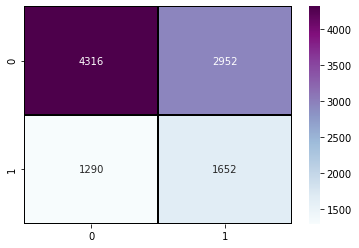

In [ ]:
class_weight= {0: 0.65, 1: 1.7}
log=LogisticRegression(class_weight='balanced',penalty='l2',max_iter=150)
clf_log=log.fit(X_train, y_train)
y_pred= clf_log.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))


Logistic: f1=0.447 auc=0.364


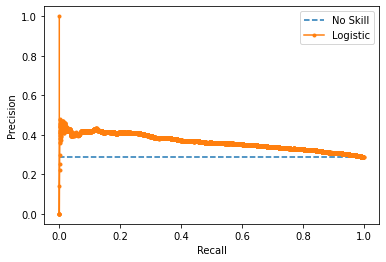

In [ ]:

clf_log=log.fit(X_train, y_train)
lr_probs =clf_log.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
y_pred= clf_log.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred1= clf_log.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6054763774563596


In [ ]:
a=len(train_df)/2
a/len(non_churn),a/len(churn)

(0.7024300968736239, 1.7349942220107402)

In [ ]:
logreg_param = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=250) 
gsearch_log = GridSearchCV(estimator = LogisticRegression(class_weight='balanced',max_iter=150), 
                           param_grid = logreg_param, 
                           scoring='roc_auc',
                           verbose=3,
                           cv=skf)

grid_log=gsearch_log.fit(X_train,y_train)

In [ ]:
print("Best: %f using %s" % (grid_log.best_score_, grid_log.best_params_))

means = grid_log.cv_results_['mean_test_score']
stds = grid_log.cv_results_['std_test_score']
params = grid_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Random Forest

In [ ]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.74      0.91      0.81      7268
           1       0.48      0.21      0.29      2942

    accuracy                           0.71     10210
   macro avg       0.61      0.56      0.55     10210
weighted avg       0.66      0.71      0.66     10210



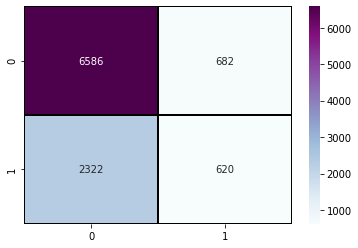

In [ ]:

rf_param = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                }
rf=RandomForestClassifier(class_weight='balanced',max_features=3,min_samples_split=3,min_samples_leaf=3,bootstrap=False)
clf_rf=rf.fit(X_train, y_train)
y_pred= clf_rf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_rf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.653680101107188


## K Neighbors

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7268
           1       0.31      0.31      0.31      2942

    accuracy                           0.60     10210
   macro avg       0.52      0.52      0.52     10210
weighted avg       0.60      0.60      0.60     10210



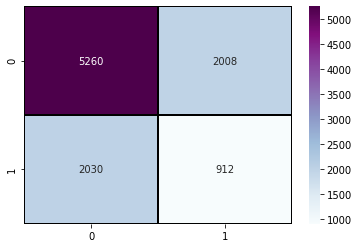

In [ ]:
knn=KNeighborsClassifier(weights='distance',n_neighbors=2)
clf_knn=knn.fit(X_train, y_train)
y_pred= clf_knn.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_knn.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.5250967662461226


## AdaBoost

In [ ]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7268
           1       0.55      0.11      0.18      2942

    accuracy                           0.72     10210
   macro avg       0.64      0.54      0.50     10210
weighted avg       0.68      0.72      0.64     10210



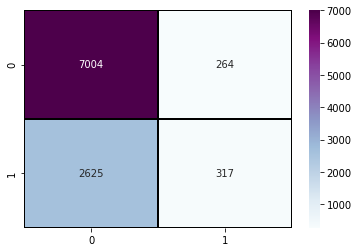

In [ ]:
ada=AdaBoostClassifier()
clf_ada=ada.fit(X_train, y_train)
y_pred= clf_ada.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_ada.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6491632439229619


## XGBM 

In [ ]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
scale_pos_weight = len(non_churn)/len(churn)
scale_pos_weight

2.4699884440214803

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      7268
           1       0.40      0.63      0.49      2942

    accuracy                           0.62     10210
   macro avg       0.60      0.62      0.59     10210
weighted avg       0.69      0.62      0.64     10210



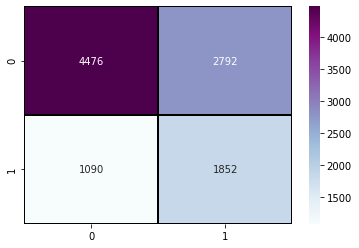

In [ ]:
xgb=XGBClassifier(max_depth=3, min_child_weight= 1, scale_pos_weight=scale_pos_weight,
                  learning_rate=0.1, n_estimators= 400,sub_sample=0.9,colsample_bytree=0.9)
clf_xgb=xgb.fit(X_train, y_train)

y_pred=clf_xgb.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))



Logistic: f1=0.488 auc=0.451


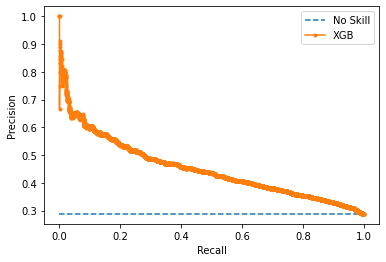

In [ ]:
probs =clf_xgb.predict_proba(X_test)
probs = probs[:, 1]
y_pred= clf_xgb.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred1= clf_xgb.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6732731263424556


In [ ]:
xgb_param = {
    'max_depth':range(1,6,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':[150,200,300,400],
    'learning_rate':[0.1,0.2,0.3,0.4]
}
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=250) 
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(scale_pos_weight=scale_pos_weight,tree_method='gpu_hist',
                                                     sub_sample=0.9,colsample_bytree=0.9), 
                           param_grid = xgb_param, 
                           scoring='roc_auc',
                           verbose=3,
                           cv=skf)

grid_xgb=gsearch_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150, score=0.648, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150, score=0.646, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150, score=0.659, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150, score=0.643, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150, score=0.655, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, score=0.652, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, score=0.650, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, score=0.663, total=   0.4s
[CV] le

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  9.1min finished


In [ ]:
print("Best: %f using %s" % (grid_xgb.best_score_, grid_xgb.best_params_))

means = grid_xgb.cv_results_['mean_test_score']
stds = grid_xgb.cv_results_['std_test_score']
params = grid_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.680968 using {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400}
0.650282 (0.005830) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 150}
0.654205 (0.005753) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 200}
0.659504 (0.005718) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 300}
0.663149 (0.005797) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 400}
0.650282 (0.005830) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 150}
0.654205 (0.005753) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 200}
0.659504 (0.005718) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 300}
0.663149 (0.005797) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 400}
0.650282 (0.005830) with

## LightGBM

In [ ]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      7268
           1       0.39      0.66      0.49      2942

    accuracy                           0.61     10210
   macro avg       0.60      0.62      0.59     10210
weighted avg       0.69      0.61      0.63     10210



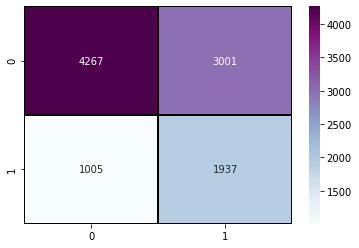

In [ ]:
lgbm=lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,learning_rate=0.3,n_estimators=70,
                   num_leaves=7,min_child_weight=0.001,min_child_samples=20)
clf_lgbm=lgbm.fit(X_train, y_train)
y_pred= clf_lgbm.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_lgbm.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.671113598924277


In [ ]:
lgbm_param = {
    'num_leaves': [7, 15, 31],
    'n_estimators':[100,150,200,300]
}

gsearch_lgbm = GridSearchCV(estimator = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,
                                                           min_child_weight=0.001,min_child_samples=20), 
                            param_grid = lgbm_param, 
                            scoring='roc_auc',
                            verbose=3,
                            cv=skf)

grid_lgbm=gsearch_lgbm.fit(X_train,y_train)


In [ ]:
print("Best: %f using %s" % (grid_lgbm.best_score_, grid_lgbm.best_params_))

means = grid_lgbm..cv_results_['mean_test_score']
stds = grid_lgbm..cv_results_['std_test_score']
params = grid_lgbm..cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Gradient Boost

# ROC Curve





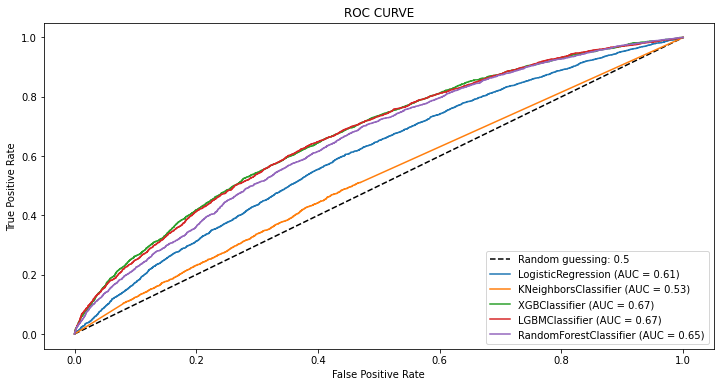

In [ ]:
from sklearn.metrics import plot_roc_curve

models = [log,knn,xgb,lgbm,rf]

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.title("ROC CURVE")
plt.legend(loc="lower right")
ax = plt.gca()

for i in models:
  plot_roc_curve(i, X_test, y_test,ax=ax)

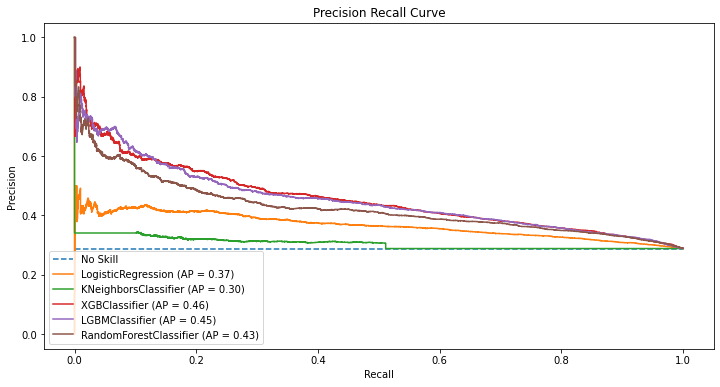

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

models = [log,knn,xgb,lgbm,rf]

plt.figure(figsize = (12,6), linewidth= 1)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.title("Precision Recall Curve")
plt.legend(loc="upper left")
ax = plt.gca()

for i in models:
  plot_precision_recall_curve(i, X_test, y_test,ax=ax)
